In [1]:
# import dependencies
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt


In [2]:
# set variable to call csv files
cities= "Resources/all_cities_years.csv"
weather = "Resources/top_cities_average_weather.csv"

In [3]:
# import csv for cities with passengers file and delete unwanted column
cities_df = pd.read_csv(cities)
del cities_df["Unnamed: 0"]


In [4]:
# first rename the columns for better visualization when we transpose the columns/rows
cities_rename = cities_df.rename(columns={"Destination City":" "})
# set index to the new renamed column
cities_set_index = cities_rename.set_index(" ")
# transpose the to have columns and rows switched
cities_transp = cities_set_index.T
# reset index so we can manipulate the column with the Months
cities_reset_index = cities_transp.reset_index()
# rename again to keep the same column name to match with the weather dataframe when we merge
cities_month_rename = cities_reset_index.rename(columns={"index":"Month"})


In [5]:
# we need to create new columns to hold the average passengers in each city
# add new columns name to the DF then using select only the desired columns and 
# get the mean using using axis=1 to go over rows in each column selected
cities_month_rename["Amsterdam(avg)"] = cities_month_rename[["Amsterdam, Netherlands (2013)","Amsterdam, Netherlands (2014)",
                                 "Amsterdam, Netherlands (2015)","Amsterdam, Netherlands (2016)",
                                 "Amsterdam, Netherlands (2017)"]].mean(axis=1)

cities_month_rename["Cancun(avg)"] = cities_month_rename[["Cancun, Mexico (2013)","Cancun, Mexico (2014)",
                                 "Cancun, Mexico (2015)","Cancun, Mexico (2016)",
                                 "Cancun, Mexico (2017)"]].mean(axis=1)


cities_month_rename["London(avg)"] = cities_month_rename[["London, United Kingdom (2013)","London, United Kingdom (2014)",
                                 "London, United Kingdom (2015)","London, United Kingdom (2016)",
                                 "London, United Kingdom (2017)"]].mean(axis=1)

cities_month_rename["Mexico City(avg)"] = cities_month_rename[["Mexico City, Mexico (2013)","Mexico City, Mexico (2014)",
                                 "Mexico City, Mexico (2015)","Mexico City, Mexico (2016)",
                                 "Mexico City, Mexico (2017)"]].mean(axis=1)

cities_month_rename["Paris(avg)"] = cities_month_rename[["Paris, France (2013)","Paris, France (2014)",
                                 "Paris, France (2015)","Paris, France (2016)",
                                 "Paris, France (2017)"]].mean(axis=1)

cities_month_rename["Punta Cana(avg)"] = cities_month_rename[["Punta Cana, Dominican Republic (2013)","Punta Cana, Dominican Republic (2014)",
                                 "Punta Cana, Dominican Republic (2015)","Punta Cana, Dominican Republic (2016)",
                                 "Punta Cana, Dominican Republic (2017)"]].mean(axis=1)

cities_month_rename["San Jose del Cabo(avg)"] = cities_month_rename[["San Jose del Cabo, Mexico (2013)","San Jose del Cabo, Mexico (2014)",
                                 "San Jose del Cabo, Mexico (2015)","San Jose del Cabo, Mexico (2016)",
                                 "San Jose del Cabo, Mexico (2017)"]].mean(axis=1)

cities_month_rename["Tokyo(avg)"] = cities_month_rename[["Tokyo, Japan (2013)","Tokyo, Japan (2014)",
                                 "Tokyo, Japan (2015)","Tokyo, Japan (2016)",
                                 "Tokyo, Japan (2017)"]].mean(axis=1)

cities_month_rename["Toronto(avg)"] = cities_month_rename[["Toronto, Canada (2013)","Toronto, Canada (2014)",
                                 "Toronto, Canada (2015)","Toronto, Canada (2016)",
                                 "Toronto, Canada (2017)"]].mean(axis=1)

cities_month_rename["Vancouver(avg)"] = cities_month_rename[["Vancouver, Canada (2013)","Vancouver, Canada (2014)",
                                 "Vancouver, Canada (2015)","Vancouver, Canada (2016)",
                                 "Vancouver, Canada (2017)"]].mean(axis=1)


In [6]:
# import csv for  weather by city
weather_df = pd.read_csv(weather)
# first rename the columns for better visualization when we transpose the columns/rows
weather_rename = weather_df.rename(columns={"City":" "})
# set index to the new renamed column
weather_set_index = weather_rename.set_index(" ")
# transpose the to have columns and rows switched
weather_transp = weather_set_index.T
# reset index so we can manipulate the column with the Months
weather_reset_index = weather_transp.reset_index()
# rename again to keep the same column name to match with the weather dataframe when we merge
weather_month_rename = weather_reset_index.rename(columns={"index":"Month"})


In [7]:
# create new DF with the passengers and weather dataframe merging on Month
averages_passenger_temp = pd.merge(cities_month_rename,
                                   weather_month_rename,on="Month",how="left")
# creatae new DF with only the columns to be manipulated
averages_df = averages_passenger_temp[['Month','Amsterdam(avg)','Amsterdam(avg.Temp)',
                                       'Cancun(avg)','Cancun(avg.Temp)',
                                       'London(avg)','London(avg.Temp)',
                                       'Mexico City(avg)','Mexico City(avg.Temp)',
                                       'Paris(avg)','Paris(avg.Temp)', 'Punta Cana(avg)',
                                       'Punta Cana(avg.Temp)','San Jose del Cabo(avg)',
                                       'San Jose del Cabo(avg.Temp)', 'Tokyo(avg)',
                                       'Tokyo(avg.Temp)', 'Toronto(avg)','Toronto(avg.Temp)',
                                       'Vancouver(avg)','Vancouver(avg.Temp)']]
averages_df


,Month,Amsterdam(avg),Amsterdam(avg.Temp),Cancun(avg),Cancun(avg.Temp),London(avg),London(avg.Temp),Mexico City(avg),Mexico City(avg.Temp),Paris(avg),...,Punta Cana(avg),Punta Cana(avg.Temp),San Jose del Cabo(avg),San Jose del Cabo(avg.Temp),Tokyo(avg),Tokyo(avg.Temp),Toronto(avg),Toronto(avg.Temp),Vancouver(avg),Vancouver(avg.Temp)
0,January,91505.2,38.1,309181.2,75.4,187661.4,44.2,128736.6,58.3,83466.2,...,89834.6,76.6,91225.4,66.0,197732.2,41.4,116941.8,25.3,80604.6,39.4
1,February,75592.2,38.3,318929.4,76.6,143290.0,44.2,107547.8,60.6,67376.4,...,99100.6,76.5,100929.2,66.6,184500.2,42.3,110637.2,27.3,76467.4,40.8
2,March,107990.2,43.0,394818.4,78.4,207920.6,47.8,121466.2,64.6,105123.6,...,127465.8,77.0,133882.2,68.2,225549.8,47.7,137276.8,34.5,91708.4,44.4
3,April,132992.4,48.4,334011.8,81.3,238232.0,53.6,116774.6,67.3,118943.2,...,112788.2,77.9,111107.0,71.4,170352.6,57.0,132203.2,46.2,85081.2,48.9
4,May,159123.4,55.2,326086.6,83.7,264697.6,58.6,123001.6,68.0,145812.0,...,116602.8,79.5,103764.6,75.2,208884.4,64.8,146855.2,57.4,112560.2,55.0
5,June,162264.2,69.7,355326.0,84.6,297033.6,64.9,141108.4,66.9,155217.4,...,146220.2,81.0,120193.8,79.7,220942.8,70.5,143214.8,66.9,129728.8,60.3
6,July,147283.2,63.7,372564.4,85.1,258365.4,67.3,155904.8,64.8,140572.2,...,169855.6,81.5,122687.2,83.3,208070.8,77.0,148652.0,72.1,142155.0,64.4
7,August,164825.4,63.5,299043.0,85.5,282617.6,66.9,144418.8,64.9,148760.6,...,116870.2,81.9,93939.2,84.0,229965.6,79.5,158408.4,70.7,142382.8,64.4
8,September,155944.4,58.5,183154.6,84.0,271376.8,63.1,114915.4,64.4,140555.4,...,57878.2,81.7,53041.6,82.8,211589.8,73.0,143892.0,63.0,104048.4,58.8
9,October,137153.8,51.8,228564.6,81.5,228461.0,56.3,132419.4,62.8,119060.0,...,66417.8,80.6,79674.2,79.2,203541.8,63.5,143263.6,51.3,85545.2,50.5


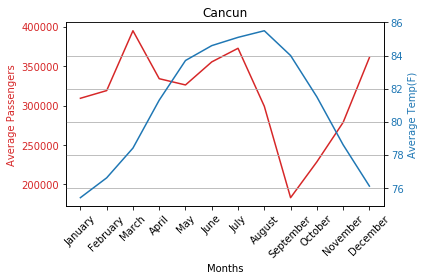

In [11]:
# set x_axis for passengers vs temperatures plot
# months will be variable to hold the months names
months = averages_df['Month']
# x_axis will be the range in the lenght of the column Month
x_axis = np.arange(len(months))
# define tick locations
tick_locations = [month for month in x_axis]

# average passengers vs average weather for CANCUN
# we will plot passengers and weather as y_axis 
# x_axis will be the months we defined above

can = averages_df['Cancun(avg)']
can_weather = averages_df['Cancun(avg.Temp)']

# create subplot
fig, ax1 = plt.subplots()

# xlabel will be the Months and only needs to be set once for both
ax1.set_xlabel('Months')

# set variable to color of Passengers labels
color = 'tab:red'
# set the label paramenters for Passengers
ax1.set_ylabel('Average Passengers', color=color)
# plot the line for Passengers calling the color defined about
ax1.plot(x_axis, can, color=color)
# call the ticks and define paraments and color to match the line color
ax1.tick_params(axis='y', labelcolor=color)

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  

# set variable to color of Weather labels
color = 'tab:blue'
# set the label paramenters for Weather
ax2.set_ylabel('Average Temp(F)', color=color)  
# plot the line for Weather calling the color defined about
ax2.plot(x_axis, can_weather, color=color)
# call the ticks and define paraments and color to match the line color
ax2.tick_params(axis='y', labelcolor=color)

# place tick locations for x_axis
plt.xticks(tick_locations, months)
# format x_axis ticks
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
# add grid to plot
plt.grid(True)
# add title
plt.title('Cancun')
# otherwise the right y-label is slightly clipped
fig.tight_layout()
# save plot as png
plt.savefig('Resources/cancun_avg_pass_temp.png')
# display
plt.show()

In [12]:
# create a new plot using only the passengers sorted by temperatures
can = averages_df['Cancun(avg)']
can_weather = averages_df['Cancun(avg.Temp)']
# from the original dataframe, call only the columns pertinent to Cancun
# sorte values on temperature ascending
sort_temp_can = averages_df[['Cancun(avg)','Cancun(avg.Temp)']].sort_values('Cancun(avg.Temp)')

# define x_axis values
temps = sort_temp_can['Cancun(avg.Temp)']
x_axis = np.arange(len(temps))
# define tick locations for x_axis
tick_locations = [temp for temp in x_axis]

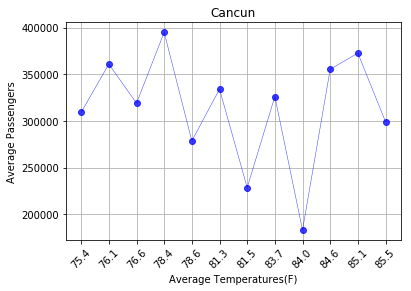

In [13]:
# plot a line graph with markers to show passengers vs temperature
plt.plot(x_axis, sort_temp_can['Cancun(avg)'],color='blue',marker='o',linewidth=.5,alpha=.75)
# place ticks for x_axis
plt.xticks(tick_locations, temps,rotation=45)
# add grip
plt.grid(True)
# add title and labels
plt.title('Cancun')
plt.xlabel('Average Temperatures(F)')
plt.ylabel('Average Passengers')
# otherwise the right y-label is slightly clipped
fig.tight_layout()  
# save plot into png
plt.savefig('Resources/cancun_temp_plot.png')
# display plot
plt.show()

In [ ]:
lon = averages_df['London(avg)']
lon_weather = averages_df['London(avg.Temp)']
# set x_axis for passengers vs temperatures plot
# months will be variable to hold the months names
months = averages_df['Month']
# x_axis will be the range in the lenght of the column Month
x_axis = np.arange(len(months))
# define tick locations
tick_locations = [month for month in x_axis]

# average passengers vs average weather for CANCUN
# we will plot passengers and weather as y_axis 
# x_axis will be the months we defined above

can = averages_df['Cancun(avg)']
can_weather = averages_df['Cancun(avg.Temp)']

# create subplot
fig, ax1 = plt.subplots()

# xlabel will be the Months and only needs to be set once for both
ax1.set_xlabel('Months')

# set variable to color of Passengers labels
color = 'tab:red'
# set the label paramenters for Passengers
ax1.set_ylabel('Average Passengers', color=color)
# plot the line for Passengers calling the color defined about
ax1.plot(x_axis, can, color=color)
# call the ticks and define paraments and color to match the line color
ax1.tick_params(axis='y', labelcolor=color)

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  

# set variable to color of Weather labels
color = 'tab:blue'
# set the label paramenters for Weather
ax2.set_ylabel('Average Temp(F)', color=color)  
# plot the line for Weather calling the color defined about
ax2.plot(x_axis, can_weather, color=color)
# call the ticks and define paraments and color to match the line color
ax2.tick_params(axis='y', labelcolor=color)

# place tick locations for x_axis
plt.xticks(tick_locations, months)
# format x_axis ticks
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
# add grid to plot
plt.grid(True)
# add title
plt.title('Cancun')
# otherwise the right y-label is slightly clipped
fig.tight_layout()
# save plot as png
plt.savefig('Resources/cancun_avg_pass_temp.png')
# display
plt.show()

In [ ]:
tok = averages_df['Tokyo(avg)']
tok_weather = averages_df['Tokyo(avg.Temp)']
# set x_axis for passengers vs temperatures plot
# months will be variable to hold the months names
months = averages_df['Month']
# x_axis will be the range in the lenght of the column Month
x_axis = np.arange(len(months))
# define tick locations
tick_locations = [month for month in x_axis]

# average passengers vs average weather for CANCUN
# we will plot passengers and weather as y_axis 
# x_axis will be the months we defined above

can = averages_df['Cancun(avg)']
can_weather = averages_df['Cancun(avg.Temp)']

# create subplot
fig, ax1 = plt.subplots()

# xlabel will be the Months and only needs to be set once for both
ax1.set_xlabel('Months')

# set variable to color of Passengers labels
color = 'tab:red'
# set the label paramenters for Passengers
ax1.set_ylabel('Average Passengers', color=color)
# plot the line for Passengers calling the color defined about
ax1.plot(x_axis, can, color=color)
# call the ticks and define paraments and color to match the line color
ax1.tick_params(axis='y', labelcolor=color)

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  

# set variable to color of Weather labels
color = 'tab:blue'
# set the label paramenters for Weather
ax2.set_ylabel('Average Temp(F)', color=color)  
# plot the line for Weather calling the color defined about
ax2.plot(x_axis, can_weather, color=color)
# call the ticks and define paraments and color to match the line color
ax2.tick_params(axis='y', labelcolor=color)

# place tick locations for x_axis
plt.xticks(tick_locations, months)
# format x_axis ticks
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
# add grid to plot
plt.grid(True)
# add title
plt.title('Cancun')
# otherwise the right y-label is slightly clipped
fig.tight_layout()
# save plot as png
plt.savefig('Resources/cancun_avg_pass_temp.png')
# display
plt.show()


In [ ]:
tor = averages_df['Toronto(avg)']
tor_weather = averages_df['Toronto(avg.Temp)']
# set x_axis for passengers vs temperatures plot
# months will be variable to hold the months names
months = averages_df['Month']
# x_axis will be the range in the lenght of the column Month
x_axis = np.arange(len(months))
# define tick locations
tick_locations = [month for month in x_axis]

# average passengers vs average weather for CANCUN
# we will plot passengers and weather as y_axis 
# x_axis will be the months we defined above

can = averages_df['Cancun(avg)']
can_weather = averages_df['Cancun(avg.Temp)']

# create subplot
fig, ax1 = plt.subplots()

# xlabel will be the Months and only needs to be set once for both
ax1.set_xlabel('Months')

# set variable to color of Passengers labels
color = 'tab:red'
# set the label paramenters for Passengers
ax1.set_ylabel('Average Passengers', color=color)
# plot the line for Passengers calling the color defined about
ax1.plot(x_axis, can, color=color)
# call the ticks and define paraments and color to match the line color
ax1.tick_params(axis='y', labelcolor=color)

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  

# set variable to color of Weather labels
color = 'tab:blue'
# set the label paramenters for Weather
ax2.set_ylabel('Average Temp(F)', color=color)  
# plot the line for Weather calling the color defined about
ax2.plot(x_axis, can_weather, color=color)
# call the ticks and define paraments and color to match the line color
ax2.tick_params(axis='y', labelcolor=color)

# place tick locations for x_axis
plt.xticks(tick_locations, months)
# format x_axis ticks
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
# add grid to plot
plt.grid(True)
# add title
plt.title('Cancun')
# otherwise the right y-label is slightly clipped
fig.tight_layout()
# save plot as png
plt.savefig('Resources/cancun_avg_pass_temp.png')
# display
plt.show()

In [ ]:
mex = averages_df['Mexico City(avg)']
mex_weather = averages_df['Mexico City(avg.Temp)']
# set x_axis for passengers vs temperatures plot
# months will be variable to hold the months names
months = averages_df['Month']
# x_axis will be the range in the lenght of the column Month
x_axis = np.arange(len(months))
# define tick locations
tick_locations = [month for month in x_axis]

# average passengers vs average weather for CANCUN
# we will plot passengers and weather as y_axis 
# x_axis will be the months we defined above

can = averages_df['Cancun(avg)']
can_weather = averages_df['Cancun(avg.Temp)']

# create subplot
fig, ax1 = plt.subplots()

# xlabel will be the Months and only needs to be set once for both
ax1.set_xlabel('Months')

# set variable to color of Passengers labels
color = 'tab:red'
# set the label paramenters for Passengers
ax1.set_ylabel('Average Passengers', color=color)
# plot the line for Passengers calling the color defined about
ax1.plot(x_axis, can, color=color)
# call the ticks and define paraments and color to match the line color
ax1.tick_params(axis='y', labelcolor=color)

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  

# set variable to color of Weather labels
color = 'tab:blue'
# set the label paramenters for Weather
ax2.set_ylabel('Average Temp(F)', color=color)  
# plot the line for Weather calling the color defined about
ax2.plot(x_axis, can_weather, color=color)
# call the ticks and define paraments and color to match the line color
ax2.tick_params(axis='y', labelcolor=color)

# place tick locations for x_axis
plt.xticks(tick_locations, months)
# format x_axis ticks
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
# add grid to plot
plt.grid(True)
# add title
plt.title('Cancun')
# otherwise the right y-label is slightly clipped
fig.tight_layout()
# save plot as png
plt.savefig('Resources/cancun_avg_pass_temp.png')
# display
plt.show()

In [ ]:
ams = averages_df['Amsterdam(avg)']
ams_weather = averages_df['Amsterdam(avg.Temp)']
# set x_axis for passengers vs temperatures plot
# months will be variable to hold the months names
months = averages_df['Month']
# x_axis will be the range in the lenght of the column Month
x_axis = np.arange(len(months))
# define tick locations
tick_locations = [month for month in x_axis]

# average passengers vs average weather for CANCUN
# we will plot passengers and weather as y_axis 
# x_axis will be the months we defined above

can = averages_df['Cancun(avg)']
can_weather = averages_df['Cancun(avg.Temp)']

# create subplot
fig, ax1 = plt.subplots()

# xlabel will be the Months and only needs to be set once for both
ax1.set_xlabel('Months')

# set variable to color of Passengers labels
color = 'tab:red'
# set the label paramenters for Passengers
ax1.set_ylabel('Average Passengers', color=color)
# plot the line for Passengers calling the color defined about
ax1.plot(x_axis, can, color=color)
# call the ticks and define paraments and color to match the line color
ax1.tick_params(axis='y', labelcolor=color)

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  

# set variable to color of Weather labels
color = 'tab:blue'
# set the label paramenters for Weather
ax2.set_ylabel('Average Temp(F)', color=color)  
# plot the line for Weather calling the color defined about
ax2.plot(x_axis, can_weather, color=color)
# call the ticks and define paraments and color to match the line color
ax2.tick_params(axis='y', labelcolor=color)

# place tick locations for x_axis
plt.xticks(tick_locations, months)
# format x_axis ticks
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
# add grid to plot
plt.grid(True)
# add title
plt.title('Cancun')
# otherwise the right y-label is slightly clipped
fig.tight_layout()
# save plot as png
plt.savefig('Resources/cancun_avg_pass_temp.png')
# display
plt.show()

In [ ]:
par = averages_df["Paris(avg)"]
par_weather = averages_df['Paris(avg.Temp)']
# set x_axis for passengers vs temperatures plot
# months will be variable to hold the months names
months = averages_df['Month']
# x_axis will be the range in the lenght of the column Month
x_axis = np.arange(len(months))
# define tick locations
tick_locations = [month for month in x_axis]

# average passengers vs average weather for CANCUN
# we will plot passengers and weather as y_axis 
# x_axis will be the months we defined above

can = averages_df['Cancun(avg)']
can_weather = averages_df['Cancun(avg.Temp)']

# create subplot
fig, ax1 = plt.subplots()

# xlabel will be the Months and only needs to be set once for both
ax1.set_xlabel('Months')

# set variable to color of Passengers labels
color = 'tab:red'
# set the label paramenters for Passengers
ax1.set_ylabel('Average Passengers', color=color)
# plot the line for Passengers calling the color defined about
ax1.plot(x_axis, can, color=color)
# call the ticks and define paraments and color to match the line color
ax1.tick_params(axis='y', labelcolor=color)

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  

# set variable to color of Weather labels
color = 'tab:blue'
# set the label paramenters for Weather
ax2.set_ylabel('Average Temp(F)', color=color)  
# plot the line for Weather calling the color defined about
ax2.plot(x_axis, can_weather, color=color)
# call the ticks and define paraments and color to match the line color
ax2.tick_params(axis='y', labelcolor=color)

# place tick locations for x_axis
plt.xticks(tick_locations, months)
# format x_axis ticks
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
# add grid to plot
plt.grid(True)
# add title
plt.title('Cancun')
# otherwise the right y-label is slightly clipped
fig.tight_layout()
# save plot as png
plt.savefig('Resources/cancun_avg_pass_temp.png')
# display
plt.show()

In [ ]:
pun = averages_df['Punta Cana(avg)']
pun_weather = averages_df['Punta Cana(avg.Temp)']
# set x_axis for passengers vs temperatures plot
# months will be variable to hold the months names
months = averages_df['Month']
# x_axis will be the range in the lenght of the column Month
x_axis = np.arange(len(months))
# define tick locations
tick_locations = [month for month in x_axis]

# average passengers vs average weather for CANCUN
# we will plot passengers and weather as y_axis 
# x_axis will be the months we defined above

can = averages_df['Cancun(avg)']
can_weather = averages_df['Cancun(avg.Temp)']

# create subplot
fig, ax1 = plt.subplots()

# xlabel will be the Months and only needs to be set once for both
ax1.set_xlabel('Months')

# set variable to color of Passengers labels
color = 'tab:red'
# set the label paramenters for Passengers
ax1.set_ylabel('Average Passengers', color=color)
# plot the line for Passengers calling the color defined about
ax1.plot(x_axis, can, color=color)
# call the ticks and define paraments and color to match the line color
ax1.tick_params(axis='y', labelcolor=color)

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  

# set variable to color of Weather labels
color = 'tab:blue'
# set the label paramenters for Weather
ax2.set_ylabel('Average Temp(F)', color=color)  
# plot the line for Weather calling the color defined about
ax2.plot(x_axis, can_weather, color=color)
# call the ticks and define paraments and color to match the line color
ax2.tick_params(axis='y', labelcolor=color)

# place tick locations for x_axis
plt.xticks(tick_locations, months)
# format x_axis ticks
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
# add grid to plot
plt.grid(True)
# add title
plt.title('Cancun')
# otherwise the right y-label is slightly clipped
fig.tight_layout()
# save plot as png
plt.savefig('Resources/cancun_avg_pass_temp.png')
# display
plt.show()

In [ ]:
van = averages_df['Vancouver(avg)']
van_weather = averages_df['Vancouver(avg.Temp)']
# set x_axis for passengers vs temperatures plot
# months will be variable to hold the months names
months = averages_df['Month']
# x_axis will be the range in the lenght of the column Month
x_axis = np.arange(len(months))
# define tick locations
tick_locations = [month for month in x_axis]

# average passengers vs average weather for CANCUN
# we will plot passengers and weather as y_axis 
# x_axis will be the months we defined above

can = averages_df['Cancun(avg)']
can_weather = averages_df['Cancun(avg.Temp)']

# create subplot
fig, ax1 = plt.subplots()

# xlabel will be the Months and only needs to be set once for both
ax1.set_xlabel('Months')

# set variable to color of Passengers labels
color = 'tab:red'
# set the label paramenters for Passengers
ax1.set_ylabel('Average Passengers', color=color)
# plot the line for Passengers calling the color defined about
ax1.plot(x_axis, can, color=color)
# call the ticks and define paraments and color to match the line color
ax1.tick_params(axis='y', labelcolor=color)

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  

# set variable to color of Weather labels
color = 'tab:blue'
# set the label paramenters for Weather
ax2.set_ylabel('Average Temp(F)', color=color)  
# plot the line for Weather calling the color defined about
ax2.plot(x_axis, can_weather, color=color)
# call the ticks and define paraments and color to match the line color
ax2.tick_params(axis='y', labelcolor=color)

# place tick locations for x_axis
plt.xticks(tick_locations, months)
# format x_axis ticks
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
# add grid to plot
plt.grid(True)
# add title
plt.title('Cancun')
# otherwise the right y-label is slightly clipped
fig.tight_layout()
# save plot as png
plt.savefig('Resources/cancun_avg_pass_temp.png')
# display
plt.show()

In [ ]:
sjd = averages_df['San Jose del Cabo(avg)']
sjd_weather = averages_df['San Jose del Cabo(avg.Temp)']
# set x_axis for passengers vs temperatures plot
# months will be variable to hold the months names
months = averages_df['Month']
# x_axis will be the range in the lenght of the column Month
x_axis = np.arange(len(months))
# define tick locations
tick_locations = [month for month in x_axis]

# average passengers vs average weather for CANCUN
# we will plot passengers and weather as y_axis 
# x_axis will be the months we defined above

can = averages_df['Cancun(avg)']
can_weather = averages_df['Cancun(avg.Temp)']

# create subplot
fig, ax1 = plt.subplots()

# xlabel will be the Months and only needs to be set once for both
ax1.set_xlabel('Months')

# set variable to color of Passengers labels
color = 'tab:red'
# set the label paramenters for Passengers
ax1.set_ylabel('Average Passengers', color=color)
# plot the line for Passengers calling the color defined about
ax1.plot(x_axis, can, color=color)
# call the ticks and define paraments and color to match the line color
ax1.tick_params(axis='y', labelcolor=color)

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  

# set variable to color of Weather labels
color = 'tab:blue'
# set the label paramenters for Weather
ax2.set_ylabel('Average Temp(F)', color=color)  
# plot the line for Weather calling the color defined about
ax2.plot(x_axis, can_weather, color=color)
# call the ticks and define paraments and color to match the line color
ax2.tick_params(axis='y', labelcolor=color)

# place tick locations for x_axis
plt.xticks(tick_locations, months)
# format x_axis ticks
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
# add grid to plot
plt.grid(True)
# add title
plt.title('Cancun')
# otherwise the right y-label is slightly clipped
fig.tight_layout()
# save plot as png
plt.savefig('Resources/cancun_avg_pass_temp.png')
# display
plt.show()